# T-test
Goal: reject the null hypothesis which tells that the mean number of horror movies is the same when released in october or another season.

Step 1: compute the mean nb of horror movies in october

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import ast
from datetime import datetime

In [114]:
df = pd.read_csv('Data/movie.metadata.genres.tsv', sep='\t' )

display(df)

,Unnamed: 0,Wikipedia movieID,Freebase movieID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie release year,Movie release month,Movie release season,genre 1,genre 2
0,0,13388989,/m/03c3qdq,Pirate Gold,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,1,1,NaN,NaN
1,1,15839614,/m/03nwzrh,Hinemoa,NaN,24.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...",1913,3,2,Drama,NaN
2,2,14071789,/m/03cspdc,The Twelfth Juror,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,4,2,Drama,NaN
3,3,7709364,/m/0kvflk,In the Mountains of Virginia,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,10,4,NaN,NaN
4,4,13389288,/m/03c3qzt,Brothers,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,2,1,Drama,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41850,41850,36465188,/m/0h2h9tt,El Gringo,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}",2012,5,2,Action,NaN
41851,41851,35320614,/m/0j7jmy8,Live at the Machine Shop,NaN,67.0,"{""/m/02h40lc"": ""English Language""}",{},2012,3,2,NaN,NaN
41852,41852,34961787,/m/0j438k5,Romeo,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",2012,7,3,Romance,NaN
41853,41853,34881832,/m/0j45hrp,Putta,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",2012,10,4,NaN,NaN


In [10]:
# Select all the rows which have month == 10 and (genre 1 == Horror or genre 2 == Horror)
nb_horror_october = df[(df['Movie release month'] == 5) & ((df['genre 1']=='Horror') | (df['genre 2']=='Horror'))].shape[0]

# Select all the rows which have month = 10
nb_movies_october = df[(df['Movie release month'] == 5)].shape[0]

# Select all the rows which have month != 10 and (genre 1 == Horror or genre 2 == Horror)
nb_horror_not_october = df[(df['Movie release month'] != 5) & ((df['genre 1']=='Horror') | (df['genre 2']=='Horror'))].shape[0]

# Select all the rows which have month != 10
nb_movies_not_october = df[(df['Movie release month'] != 5)].shape[0]


In [74]:
nb_horror_october

311

In [127]:
nb_horror_not_october/11

201.0

# Part 3: t-test

#### **1) Relation between the number of horror movies and the release month**
We noticed when plotting the number of horror movies per months a clear pick for the month of October. This assumption seems coherent since Halloween is the 31th of October! 

It could therefore be interesting to perform t-tests in order to reject the null hypothesis that the average number of horror movies per year is not dependent on a release in October:

H0: "Mean of horror movies per year in October == Mean of horror movies per year not in October."

Let's call the function 'ttest'. This function computes the respective means of the groups in october and not in october for all years, computes the p-value for the hypothesis testing, and also plots the number of horror movies per year for the two groups.

**Note:** From the plots of Part 2, it was found that before the year 1980, the number of horror movies is insufficient to perform a decent analysis, so the function discards the years before 1980.

In [63]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [183]:
from helpers_part3 import ttest

In [199]:
# The list of months we want to compare 
months = pd.Series([10])

The average number of Horror movies in ['Oct'] by year (after the year 1980 ) is: 7.45
The average number of Horror movies not in ['Oct'] by year (after the year 1980 ) is: 4.50
The p-value for the t-test is equal to 0.016860 so the null hypothesis is rejected.


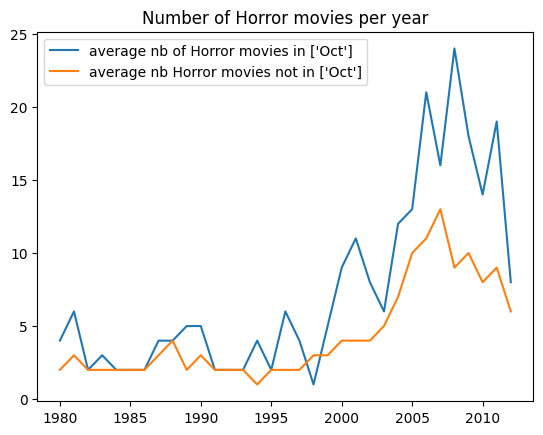

In [201]:
ttest(df,'Horror', months, 1980) #df, genre, month, min year considered (optional)

From the above plot and the result of the t-test, the difference in number of movies is statistically significant. 

#### **2) Relation between the number of Family movies and the release month**

From the plots in Part 2, we noticed 3 pics for the months of July, November, and December. This tendency seems coherent since these periods correspond to holiday breaks.
Let's use again a t-test with the null hypothesis:

H0: "Mean of Family movies per year and per month for July, November, and December == Mean of Family movies per year and per months for all the other months."

**Note:** We consider here the data from all years (see plot of Part 2).

In [202]:
months = pd.Series([7,11,12])

The average number of Family film movies in ['Jul' 'Nov' 'Dec'] by year is: 3.90
The average number of Family film movies not in ['Jul' 'Nov' 'Dec'] by year is: 3.07
The p-value for the t-test is equal to 0.040734 so the null hypothesis is rejected.


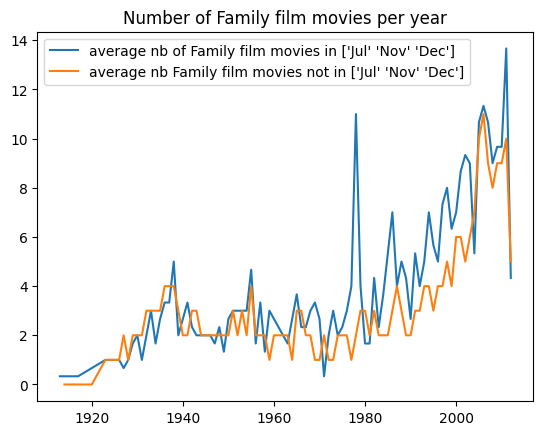

In [203]:

ttest(df,'Family film', months, None) #df, genre, month, min year considered (optional)

Here again the null hypothesis is rejected, even if the difference in the plots and in the means is less straight forward. 

#### **3) Relation between the number of Romance and the release month**

From the plots in Part 2, we noticed 1 small pic for the month of February. This tendency seems coherent since this period corresponds to Valentine's day.
Let's use again a t-test with the null hypothesis:

H0: "Mean of Romance movies per year in February == Mean of Romance movies per year not in February."

**Note:** We consider here the data from the years 1990 (see plot of Part 2).

In [209]:
months = pd.Series([2])

The average number of Romance movies in ['Feb'] by year (after the year 1990 ) is: 11.39
The average number of Romance movies not in ['Feb'] by year (after the year 1990 ) is: 11.45
The p-value for the t-test is equal to 1.000000 so the null hypothesis is not rejected.


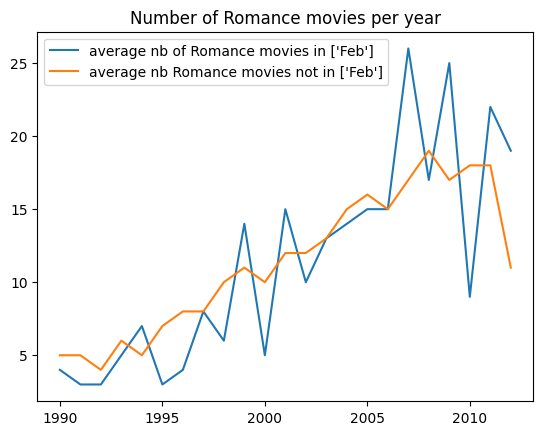

In [210]:
ttest(df,'Romance', months, 1990) #df, genre, month, min year considered (optional)

This time the difference is not statically significant, the null hypothesis is not rejected, so we conclude that there is not more Romance movies in February.

In [54]:

nb_horror_october = df[(df['Movie release month'] == 10) & (df['Movie release year'] >= 1950)& ((df['genre 1']=='Horror') | 
                                                        (df['genre 2']=='Horror'))] #.shape[0]
nb_horror_october_by_year = nb_horror_october.groupby(['Movie release year'])['Movie name'].count()
nb_horror_october_by_year.mean()

5.528301886792453

In [55]:
nb_horror_not_october = df[(df['Movie release month'] != 10) &  (df['Movie release year'] >= 1950)&((df['genre 1']=='Horror') | 
                                                        (df['genre 2']=='Horror'))] #.shape[0]
nb_horror_not_october_by_year = nb_horror_not_october.groupby(['Movie release year'])['Movie name'].count()
np.round(nb_horror_not_october_by_year/11).mean()

2.9523809523809526

Text(0.5, 1.0, 'Number of horror movies per year')

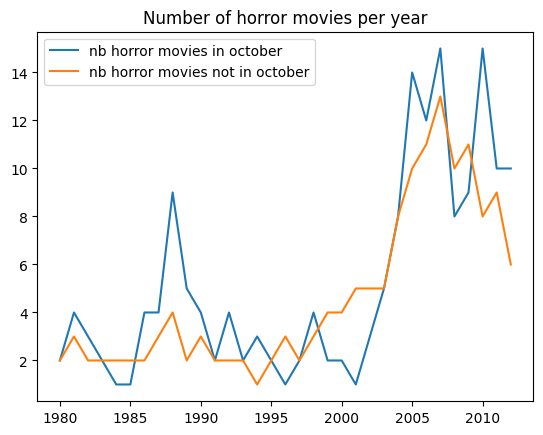

In [13]:


plt.plot(nb_horror_october_by_year,label="nb horror movies in october")
plt.plot(np.round(nb_horror_not_october_by_year/11),label="nb horror movies not in october")
plt.legend()
plt.title("Number of horror movies per year")

In [139]:
#plt.boxplot(nb_horror_october_by_year)

In [38]:
import scipy.stats 
display(scipy.stats.ttest_ind(nb_horror_october_by_year, np.round(nb_horror_not_october_by_year/11)))
ttest = scipy.stats.ttest_ind(nb_horror_october_by_year, np.round(nb_horror_not_october_by_year/11))
ttest.pvalue

TtestResult(statistic=1.4175083980493581, pvalue=0.159014824277842, df=116.0)

0.159014824277842

In [145]:
nb_horror_not_october_2010 = df[(df['Movie release month'] != 10) & (df['Movie release year'] == 1980) & ((df['genre 1']=='Horror') | 
                                                        (df['genre 2']=='Horror'))].shape[0]
nb_horror_not_october_2010/11

2.272727272727273

In [38]:
# Ratio of horror movies in october
ratio_horror_october = nb_horror_october / nb_movies_october
ratio_horror_october

0.0751207729468599

In [39]:
# Ratio number of horror movies not in october
ratio_horror_not_october = nb_horror_not_october / nb_movies_not_october
ratio_horror_not_october

0.05862388969905873

T-test


H0: "The average box office of a horror movie released in october is equal to the average box office of a horror movie not released in october."

In [7]:
box_office_horror_october = df[(df['Movie release month'] == 10) & ((df['genre 1']=='Horror') | (df['genre 2']=='Horror'))]['Movie box office revenue'].dropna()
box_office_horror_october.mean()

48349876.21686747

In [8]:
box_office_horror_not_october = df[((df['Movie release month'] != 10)) & ((df['genre 1']=='Horror') | (df['genre 2']=='Horror'))]['Movie box office revenue'].dropna()
box_office_horror_not_october.mean()

54751463.45810056

In [9]:
import scipy.stats 
display(scipy.stats.ttest_ind(box_office_horror_october, box_office_horror_not_october))

TtestResult(statistic=-0.5646656085308688, pvalue=0.5725061226007546, df=618.0)